## Day 8

https://adventofcode.com/2022/day/8

In [1]:
import numpy as np

def parse08(filename):
    with open(filename) as f:
         return np.array([ [ int(n) for n in l.strip() ] for l in f.readlines() ])

In [2]:
def isVisible(i,j,grid):
    visT = sum([ 1 for t in grid[   :j,i] if t >= grid[j][i] ])==0 
    visB = sum([ 1 for t in grid[j+1: ,i] if t >= grid[j][i] ])==0 
    visL = sum([ 1 for t in grid[j,   :i] if t >= grid[j][i] ])==0 
    visR = sum([ 1 for t in grid[j,i+1: ] if t >= grid[j][i] ])==0
    return visT or visB or visL or visR

def countVisible(grid):
    visible = np.zeros(grid.shape,int)
    for i in range(grid.shape[1]):
        for j in range(grid.shape[0]):
            visible[j][i] = isVisible(i,j,grid)
    return sum(sum(visible)),visible

In [4]:
grid0 = parse08("data/test08.txt")
grid = parse08("data/input08.txt")

print("Test 1:",countVisible(grid0)[0])
sol1,visible=countVisible(grid)
print("Part 1:",sol1)

Test 1: 21
Part 1: 1840


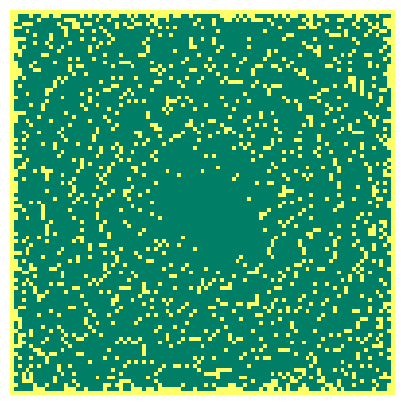

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.axis('off')
_ = ax.imshow(visible,cmap="summer")

In [18]:
def computeViewDistance(h,los):
    vd = 0
    for t in los:
        vd += 1
        if t>=h:
            break
    return vd

def scenicScore(i,j,grid):
    vdT = computeViewDistance( grid[j][i], np.flip(grid[   :j,i],0) ) # flip order for line-of-sight
    vdB = computeViewDistance( grid[j][i],         grid[j+1: ,i]    )
    vdL = computeViewDistance( grid[j][i], np.flip(grid[j,   :i],0) ) # flip order for line-of-sight
    vdR = computeViewDistance( grid[j][i],         grid[j,i+1: ]    )
    return vdT*vdB*vdL*vdR

def highestScenicScore(grid):
    score = np.zeros(grid.shape,int)
    for i in range(grid.shape[1]):
        for j in range(grid.shape[0]):
            score[j][i] = scenicScore(i,j,grid)
    return np.amax(score),score

In [19]:
print("Test 2:",highestScenicScore(grid0)[0])
sol2,score=highestScenicScore(grid)
print("Part 2:",sol2)

Test 2: 8
Part 2: 405769


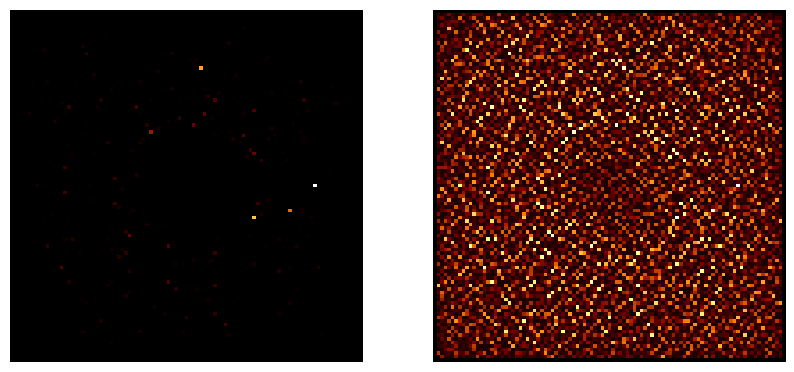

In [40]:
fix, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].axis('off')
ax[0].imshow(score,cmap="afmhot")


ax[1].axis('off')
ax[1].imshow(np.log(score+1),cmap="afmhot")